In [1]:
import pandas as pd

In [2]:
vimana_df = pd.read_csv('vimana.csv')

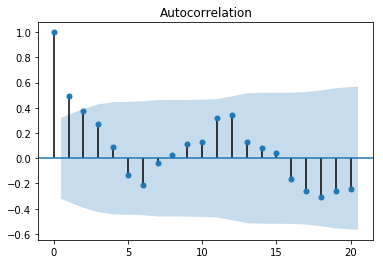

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot = plot_acf(vimana_df.demand,lags=20)

C:\Users\hp user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


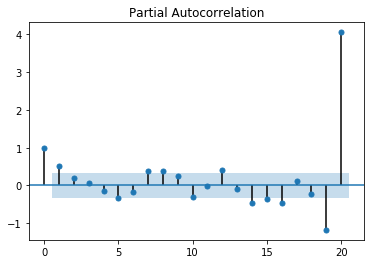

In [7]:
pacf_plot = plot_pacf ( vimana_df.demand,lags = 20)

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
import numpy as np
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).as_matrix(),order=(1,1,0))
ar_model = arima.fit()

C:\Users\hp user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
ar_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
==================================================================
Model:              ARIMA            BIC:                 364.8272
Dependent Variable: D.y              Log-Likelihood:      -177.36 
Date:               2020-02-05 09:02 Scale:               1.0000  
No. Observations:   29               Method:              css-mle 
Df Model:           2                Sample:              1       
Df Residuals:       27                                    0       
Converged:          1.0000           S.D. of innovations: 109.135 
No. Iterations:     18.0000          HQIC:                362.010 
AIC:                360.7253                                      
-------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const         -0.7776   13.8840  -0.0560  0.9557  -27.9897  26.4345
ar.L1.D.y     -0.4762    0.1580  -3.0134  0.0056   -0.7859  -0.1665
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
AR.1           -2.1000            0.0000          2.1000            0.5000
==================================================================

"""

In [11]:
    forecast_31_37 = ar_model.predict(30,36)

In [12]:
forecast_31_37

array([-21.6236769 ,   9.14887999,  -5.50442207,   1.47319965,
        -1.84941014,  -0.26724701,  -1.02064278])

In [14]:
def get_mape(actual,predicted):
    y_true,y_pred = np.array(actual),np.array(predicted)
    return np.round( np.mean(np.abs(actual - predicted)/actual)*100,2)

In [15]:
get_mape(vimana_df.demand[30:],forecast_31_37)

100.59